In [1]:
# import stuff
from os.path import isfile,isdir
from os import mkdir,chdir,getcwd
import pickle as pk
import pandas as pd
import numpy as np
import subprocess
from time import sleep
import argparse

# enable inline graphics
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


In [2]:
pricedf = pd.read_csv('ec2ondemandprices20200419.csv')
if pricedf['priceHour'].dtype == 'O':
    pricedf['priceHour'] = pd.to_numeric(pricedf.priceHour.str.extract('(\d*\.?\d.?\d.?\d.)')[0])

priceCutOff = 0.5
dfTest = pricedf[pricedf['priceHour'] < priceCutOff]

typeList = dfTest['instanceType'].tolist()
priceList = np.round(dfTest['priceHour'].tolist(),4)

price_dir = {typeList[i]: priceList[i] for i in range(len(typeList))} 
price_dir

{'t3.nano': 0.0062,
 't3.micro': 0.0125,
 't3.small': 0.025,
 't3.medium': 0.0499,
 't3.large': 0.0998,
 't3.xlarge': 0.1997,
 't3.2xlarge': 0.3994,
 'm5.large': 0.115,
 'm5.xlarge': 0.23,
 'm5.2xlarge': 0.461,
 'c5.large': 0.102,
 'c5.xlarge': 0.204,
 'c5.2xlarge': 0.408,
 'r5.large': 0.151,
 'r5.xlarge': 0.302,
 'r5d.large': 0.173,
 'r5d.xlarge': 0.346,
 'i3en.large': 0.271}

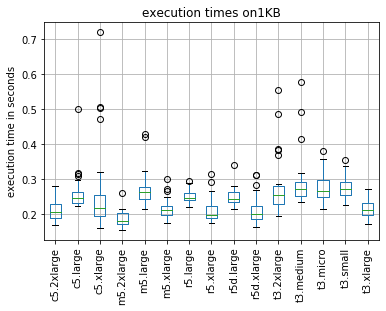

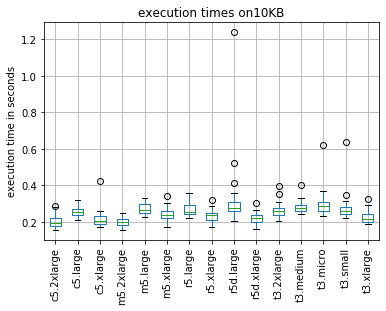

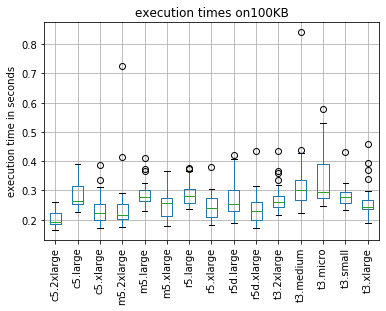

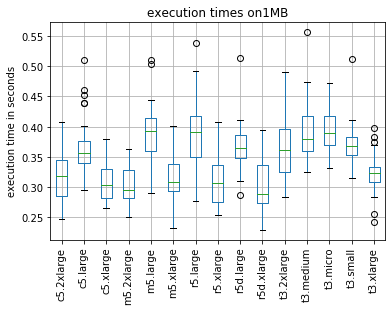

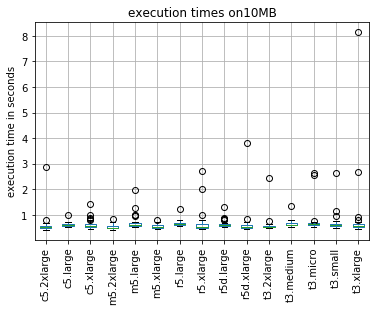

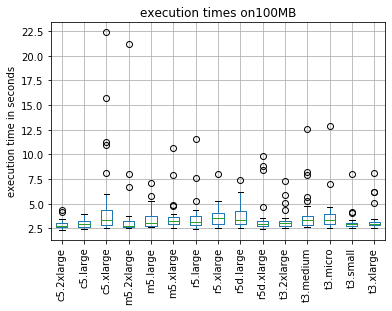

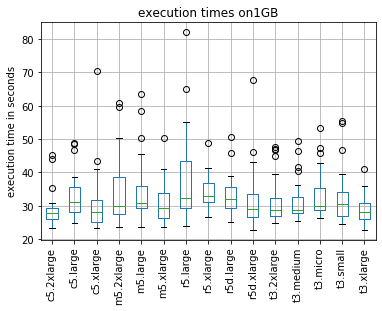

<Figure size 432x288 with 0 Axes>

In [3]:
import os
file_names = ["1KB","10KB", "100KB", "1MB", "10MB", "100MB", "1GB"]
for curr_col in range(7):
    ser = {}
    for i in sorted(os.listdir("latencies/")):
        df = pd.read_csv("latencies/" + i, header = None)
        ser[i[10:-4]] = df[curr_col]
    results = pd.DataFrame(ser)
    bp1 = results.boxplot(rot=90)
    bp1.set_title("execution times on" + file_names[curr_col])
    bp1.set_ylabel('execution time in seconds')
    bp1 = figure(curr_col + 2)

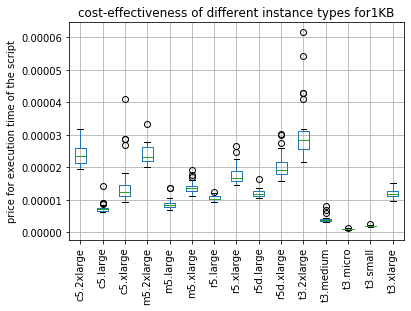

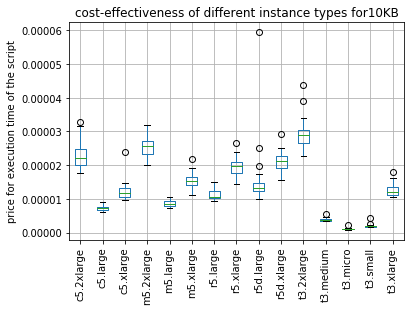

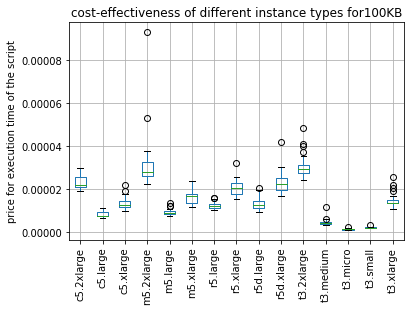

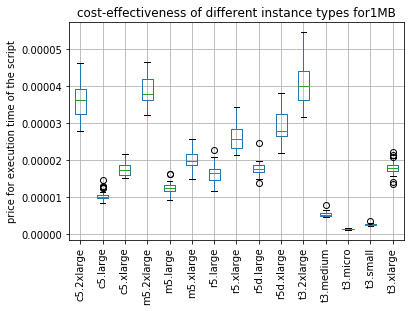

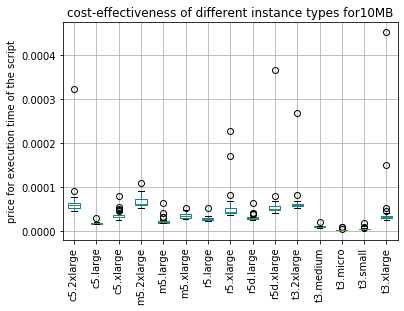

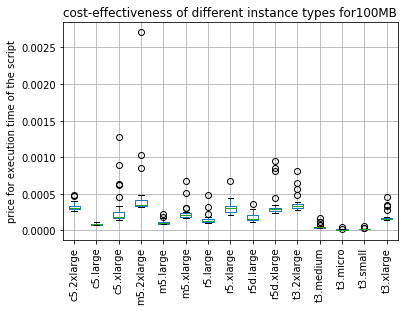

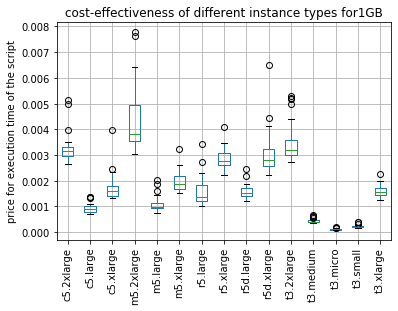

<Figure size 432x288 with 0 Axes>

In [4]:
import os
file_names = ["1KB","10KB", "100KB", "1MB", "10MB", "100MB", "1GB"]
for curr_col in range(7):
    ser = {}
    for i in sorted(os.listdir("latencies/")):
        df = pd.read_csv("latencies/" + i, header = None)
        ser[i[10:-4]] = df[curr_col] * price_dir[i[10:-4]] / 3600
    results = pd.DataFrame(ser)
    bp2 = results.boxplot(rot=90)
    bp2.set_title('cost-effectiveness of different instance types for'  + file_names[curr_col])
    bp2.set_ylabel('price for execution time of the script')
    bp2 = figure(curr_col + 2)

In [5]:
/Users/apple/Documents/20Spring/DSC291/Public-DSC291/hw2/latencies

SyntaxError: invalid syntax (<ipython-input-5-13f8e5fb981a>, line 1)